In [2]:
import os
!git clone https://github.com/ntasfi/PyGame-Learning-Environment.git
os.chdir('PyGame-Learning-Environment')
!pip install -e .
!pip install pygame
os.chdir('/content')

Cloning into 'PyGame-Learning-Environment'...
remote: Enumerating objects: 1118, done.
remote: Total 1118 (delta 0), reused 0 (delta 0), pack-reused 1118
Receiving objects: 100% (1118/1118), 8.06 MiB | 34.66 MiB/s, done.
Resolving deltas: 100% (593/593), done.
Obtaining file:///content/PyGame-Learning-Environment
  Running setup.py develop for ple
     |████████████████████████████████| 11.4MB 2.8MB/s 


In [0]:
import pygame
from random import randint
from AgentModule import Agent
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
# Set options to activate or deactivate the game view, and its speed
display_option = False
speed = 0
pygame.font.init()

In [0]:
class Game:

    def __init__(self, game_width, game_height):
        pygame.display.set_caption('SnakeGen')
        self.game_width = game_width
        self.game_height = game_height
        self.gameDisplay = pygame.display.set_mode((game_width, game_height+60))
        self.bg = pygame.image.load("background.png")
        self.crash = False
        self.player = Player(self)
        self.food = Food()
        self.score = 0

In [0]:
class Player(object):

    def __init__(self, game):
        x = 0.45 * game.game_width
        y = 0.5 * game.game_height
        self.x = x - x % 20
        self.y = y - y % 20
        self.position = []
        self.position.append([self.x, self.y])
        self.food = 1
        self.eaten = False
        self.image = pygame.image.load('snakeBody.png')
        self.x_change = 20
        self.y_change = 0

    def update_position(self, x, y):
        if self.position[-1][0] != x or self.position[-1][1] != y:
            if self.food > 1:
                for i in range(0, self.food - 1):
                    self.position[i][0], self.position[i][1] = self.position[i + 1]
            self.position[-1][0] = x
            self.position[-1][1] = y

    def do_move(self, move, x, y, game, food,agent):
        move_array = [self.x_change, self.y_change]

        if self.eaten:

            self.position.append([self.x, self.y])
            self.eaten = False
            self.food = self.food + 1
        if np.array_equal(move ,[1, 0, 0]):
            move_array = self.x_change, self.y_change
        elif np.array_equal(move,[0, 1, 0]) and self.y_change == 0:  # right - going horizontal
            move_array = [0, self.x_change]
        elif np.array_equal(move,[0, 1, 0]) and self.x_change == 0:  # right - going vertical
            move_array = [-self.y_change, 0]
        elif np.array_equal(move, [0, 0, 1]) and self.y_change == 0:  # left - going horizontal
            move_array = [0, -self.x_change]
        elif np.array_equal(move,[0, 0, 1]) and self.x_change == 0:  # left - going vertical
            move_array = [self.y_change, 0]
        self.x_change, self.y_change = move_array
        self.x = x + self.x_change
        self.y = y + self.y_change

        if self.x < 20 or self.x > game.game_width-40 or self.y < 20 or self.y > game.game_height-40 or [self.x, self.y] in self.position:
            game.crash = True
        eat(self, food, game)

        self.update_position(self.x, self.y)

    def display_player(self, x, y, food, game):
        self.position[-1][0] = x
        self.position[-1][1] = y

        if game.crash == False:
            for i in range(food):
                x_temp, y_temp = self.position[len(self.position) - 1 - i]
                game.gameDisplay.blit(self.image, (x_temp, y_temp))

            update_screen()
        else:
            pygame.time.wait(300)

In [0]:
class Food(object):

    def __init__(self):
        self.x_food = 240
        self.y_food = 200
        self.image = pygame.image.load('food2.png')

    def food_coord(self, game, player):
        x_rand = randint(20, game.game_width - 40)
        self.x_food = x_rand - x_rand % 20
        y_rand = randint(20, game.game_height - 40)
        self.y_food = y_rand - y_rand % 20
        if [self.x_food, self.y_food] not in player.position:
            return self.x_food, self.y_food
        else:
            self.food_coord(game,player)

    def display_food(self, x, y, game):
        game.gameDisplay.blit(self.image, (x, y))
        update_screen()

In [0]:
def eat(player, food, game):
    if player.x == food.x_food and player.y == food.y_food:
        food.food_coord(game, player)
        player.eaten = True
        game.score = game.score + 1


def get_record(score, record):
        if score >= record:
            return score
        else:
            return record


def display_ui(game, score, record):
    myfont = pygame.font.SysFont('Segoe UI', 20)
    myfont_bold = pygame.font.SysFont('Segoe UI', 20, True)
    text_score = myfont.render('SCORE: ', True, (0, 0, 0))
    text_score_number = myfont.render(str(score), True, (0, 0, 0))
    text_highest = myfont.render('HIGHEST SCORE: ', True, (0, 0, 0))
    text_highest_number = myfont_bold.render(str(record), True, (0, 0, 0))
    game.gameDisplay.blit(text_score, (45, 440))
    game.gameDisplay.blit(text_score_number, (120, 440))
    game.gameDisplay.blit(text_highest, (190, 440))
    game.gameDisplay.blit(text_highest_number, (350, 440))
    game.gameDisplay.blit(game.bg, (10, 10))


def display(player, food, game, record):
    game.gameDisplay.fill((255, 255, 255))
    display_ui(game, game.score, record)
    player.display_player(player.position[-1][0], player.position[-1][1], player.food, game)
    food.display_food(food.x_food, food.y_food, game)


def update_screen():
    pygame.display.update()


def initialize_game(player, game, food, agent):
    state_init1 = agent.get_state(game, player, food)  # [0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0]
    action = [1, 0, 0]
    player.do_move(action, player.x, player.y, game, food, agent)
    state_init2 = agent.get_state(game, player, food)
    reward1 = agent.set_reward(player, game.crash)
    agent.remember(state_init1, action, reward1, state_init2, game.crash)
    agent.replay_new(agent.memory)


def plot_seaborn(array_counter, array_score):
    sns.set(color_codes=True)
    ax = sns.regplot(np.array([array_counter])[0], np.array([array_score])[0], color="b", x_jitter=.1, line_kws={'color':'green'})
    ax.set(xlabel='games', ylabel='score')
    plt.show()

In [0]:
def run():
    pygame.init()
    agent = Agent()
    counter_games = 0
    score_plot = []
    counter_plot =[]
    record = 0
    while counter_games < 250:
        # Initialize classes
        game = Game(440, 440)
        player1 = game.player
        food1 = game.food

        # Perform first move
        initialize_game(player1, game, food1, agent)
        if display_option:
            display(player1, food1, game, record)

        while not game.crash:
            #agent.epsilon is set to give randomness to actions
            agent.epsilon = 80 - counter_games
            
            #get old state
            state_old = agent.get_state(game, player1, food1)
            
            #perform random actions based on agent.epsilon, or choose the action
            if randint(0, 200) < agent.epsilon:
                final_move = to_categorical(randint(0, 2), num_classes=3)
            else:
                # predict action based on the old state
                prediction = agent.model.predict(state_old.reshape((1,11)))
                final_move = to_categorical(np.argmax(prediction[0]), num_classes=3)
                
            #prediction = agent.model.predict(state_old.reshape((1,11)))
            #final_move = to_categorical(np.argmax(prediction[0]), num_classes=3)
                
            #perform new move and get new state
            player1.do_move(final_move, player1.x, player1.y, game, food1, agent)
            state_new = agent.get_state(game, player1, food1)
            
            #set treward for the new state
            reward = agent.set_reward(player1, game.crash)
            
            #train short memory base on the new action and state
            agent.train_short_memory(state_old, final_move, reward, state_new, game.crash)
            
            # store the new data into a long term memory
            agent.remember(state_old, final_move, reward, state_new, game.crash)
            record = get_record(game.score, record)
            if display_option:
                display(player1, food1, game, record)
                pygame.time.wait(speed)
        
        agent.replay_new(agent.memory)
        counter_games += 1
        print('Game', counter_games, '      Score:', game.score)
        score_plot.append(game.score)
        counter_plot.append(counter_games)
    agent.model.save_weights('weights.hdf5')
    plot_seaborn(counter_plot, score_plot)

Game 1       Score: 0
Game 2       Score: 0
Game 3       Score: 0
Game 4       Score: 1
Game 5       Score: 1
Game 6       Score: 1
Game 7       Score: 0
Game 8       Score: 1
Game 9       Score: 0
Game 10       Score: 1
Game 11       Score: 1
Game 12       Score: 3
Game 13       Score: 3
Game 14       Score: 1
Game 15       Score: 2
Game 16       Score: 2
Game 17       Score: 2
Game 18       Score: 3
Game 19       Score: 0
Game 20       Score: 2
Game 21       Score: 3
Game 22       Score: 2
Game 23       Score: 4
Game 24       Score: 3
Game 25       Score: 3
Game 26       Score: 4
Game 27       Score: 5
Game 28       Score: 3
Game 29       Score: 7
Game 30       Score: 3
Game 31       Score: 10
Game 32       Score: 3
Game 33       Score: 4
Game 34       Score: 5
Game 35       Score: 3
Game 36       Score: 3
Game 37       Score: 3
Game 38       Score: 5
Game 39       Score: 5
Game 40       Score: 4
Game 41       Score: 11
Game 42       Score: 5
Game 43       Score: 4
Game 44       Scor

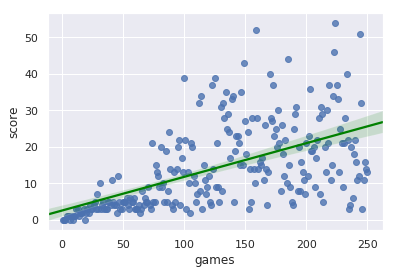

In [78]:
run()

In [0]:
os.environ["SDL_VIDEODRIVER"] = 'dummy'

In [17]:
pygame.init()
pygame.display.list_modes()

-1

In [0]:
import random

In [0]:
x = []
for _ in range(20):
  x.append(round(random.gauss(29.3,8),0))

In [53]:
x

[29.0,
 38.0,
 38.0,
 32.0,
 22.0,
 45.0,
 32.0,
 15.0,
 36.0,
 27.0,
 20.0,
 20.0,
 22.0,
 48.0,
 7.0,
 16.0,
 13.0,
 46.0,
 47.0,
 23.0]

In [52]:
sum(x)/20

28.8